# Classificação
Após a criação dataset, iremos aplicar alguns algoritmos de classificação sobre os dados, com o objetivo de identificar quais fatores indicariam o estado físico da pessoa acidentada. Para isso, iremos utilizar o dataset tratado no notebook: 1 - Coleta e Processamento-Tratamento dos Dados.

In [1]:
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.dummy import DummyClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
warnings.filterwarnings("ignore")

* Importação do dataset gerado no Notebook 1 – Coleta e Processamento-Tratamento dos Dados 

O dataset dadostratados.csv deve permanecer na pasta: C:\TCC\DATASETS

In [2]:
#Diretório e leitura do dataset
path = r'C:\TCC\DATASETS\dadostratados.csv'
#Importação na codificação "utf-8"
df = pd.read_csv(path, sep = ',', decimal=",", encoding = "utf-8", index_col=0)
#Mostrando as 05 primeiras colunas
df.head()

,br,causa_acidente,condicao_metereologica,dia_semana,fase_dia,pessoas,sentido_via,tipo_acidente,tipo_pista,tracado_via,...,veiculos,tipo_veiculo,ano_fabricacao_veiculo,tipo_envolvido,estado_fisico,sexo,ano,mes,hora,faixa_etaria
0,101,outras,ceu claro,segunda,pleno dia,3,Crescente,colisão transversal,Dupla,Reta,...,2,caminhão,1997,Condutor,ileso,masculino,2011,10,11,[15-24]
1,101,outras,ceu claro,segunda,pleno dia,3,Crescente,colisão transversal,Dupla,Reta,...,2,motocicleta,2008,Condutor,ferido grave,masculino,2011,10,11,[25-34]
2,101,outras,ceu claro,segunda,pleno dia,3,Crescente,colisão transversal,Dupla,Reta,...,2,motocicleta,2008,Passageiro,ferido grave,feminino,2011,10,11,Ignorada
3,381,outras,sol,sexta,amanhecer,1,Decrescente,saída de pista,Dupla,Reta,...,1,caminhão-trator,1997,Condutor,ileso,masculino,2011,10,6,[55-64]
4,407,falta de atenção,ceu claro,sexta,pleno dia,3,Crescente,colisão traseira,Simples,Reta,...,3,automóvel,2002,Condutor,ileso,masculino,2011,10,16,[25-34]


In [3]:
# Relembrando as colunas do Dataset
print(df.columns)
print(df.shape)

Index(['br', 'causa_acidente', 'condicao_metereologica', 'dia_semana',
       'fase_dia', 'pessoas', 'sentido_via', 'tipo_acidente', 'tipo_pista',
       'tracado_via', 'uf', 'uso_solo', 'veiculos', 'tipo_veiculo',
       'ano_fabricacao_veiculo', 'tipo_envolvido', 'estado_fisico', 'sexo',
       'ano', 'mes', 'hora', 'faixa_etaria'],
      dtype='object')
(2704727, 22)


* Tratamento no Dataset

1) Criação das classes alvos para os algotimos de classificação

2) Remoção de colunas desnecessárias

3) Uso do LabelEncoder para transformar os tipos objetos para categóricos

In [4]:
#Criando a coluna que será utilizando como atributo alvo
df.loc[df['estado_fisico'] == 'óbito', 'target'] = 0
df.loc[df['estado_fisico'] == 'ferido grave', 'target'] = 1
df.loc[df['estado_fisico'] == 'ferido leve', 'target'] = 2
df.loc[df['estado_fisico'] == 'ileso', 'target'] = 3
df['target'] = df['target'].astype(float).astype(int)

In [5]:
df['target'].value_counts(normalize=True)

3    0.648323
2    0.244788
1    0.081824
0    0.025065
Name: target, dtype: float64

Com base no estado físico das vítimas acidentadas, tívemos nos últimos dez anos o seguinte: 1.753.538 ilesos (64,8%), 662.084  com ferimentos leves (24,5%), 221.312 com ferimentos graves (8,2%) e 67.793 óbitos (2,5%) nas rodovias federais.

Há um desbalanceamento entre a quantidade de ilesos, ferimentos leves, ferimentos graves e óbitos.

In [6]:
#Removendo as colunas desnecessárias para análise
df = df.drop(columns=['ano', 'estado_fisico'])

In [7]:
#Análise do dataframe que será analisado
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2704727 entries, 0 to 2704814
Data columns (total 21 columns):
br                        int64
causa_acidente            object
condicao_metereologica    object
dia_semana                object
fase_dia                  object
pessoas                   int64
sentido_via               object
tipo_acidente             object
tipo_pista                object
tracado_via               object
uf                        object
uso_solo                  object
veiculos                  int64
tipo_veiculo              object
ano_fabricacao_veiculo    int64
tipo_envolvido            object
sexo                      object
mes                       int64
hora                      int64
faixa_etaria              object
target                    int32
dtypes: int32(1), int64(6), object(14)
memory usage: 443.7+ MB


In [8]:
#Label Encoding para categóricos
def df_labelencoder(df):
    for column in df.columns:
        if df[column].dtype == type(object):
            le = LabelEncoder()
            df[column] = le.fit_transform(df[column].astype(str))
    return df

df_final = df_labelencoder(df)

#### Classificadores
Agora vamos avaliar os classificadores DummyClassifier, GaussianNB, LinearDiscriminantAnalysis e DecisionTreeClassifier

In [9]:
def test_classifier(clf, X_train, X_test, y_train, y_test, clf_name):
    
    clf.fit(X_train, y_train)
    print("---- " + clf_name + "----")
    print("Acurácia (base de treinamento):", clf.score(X_train, y_train))
       
    pred = clf.predict(X_test)
    print("Acurácia de previsão:", accuracy_score(y_test, pred))
    print(classification_report(y_test, pred))
    print(confusion_matrix(y_test, pred))
    return clf

X_train, X_test, y_train, y_test = train_test_split(df_final.drop('target',axis=1),df_final['target'], test_size=0.2)
print("Divisão dos dados")
print(X_train.shape,X_test.shape)
print(y_train.shape,y_test.shape)

Divisão dos dados
(2163781, 20) (540946, 20)
(2163781,) (540946,)


#### DummyClassifier
Conforme sua documentação técnica, o DummyClassifier "É um classificador que faz previsões usando regras simples."
Esse classificador é útil como uma linha de base simples para comparar com outros classificadores (reais).

A linha base é comum no processo de criação de modelos pois serve como um ponto de referência para poder estimar com modelos mais robustos a eficiência gerada em cima dessa base. E a base está longe de ser perfeita, é apenas uma das formas de apurar a eficácia do modelo que será escolhido e o quanto ele realmente se distingue.

In [10]:
dummy = DummyClassifier(random_state=0)
test_classifier(dummy, X_train, X_test, y_train, y_test, "DummyClassifier")

---- DummyClassifier----
Acurácia (base de treinamento): 0.4874582963802714
Acurácia de previsão: 0.487714115641857
              precision    recall  f1-score   support

           0       0.03      0.03      0.03     13546
           1       0.08      0.08      0.08     44526
           2       0.24      0.25      0.24    132087
           3       0.65      0.65      0.65    350787

   micro avg       0.49      0.49      0.49    540946
   macro avg       0.25      0.25      0.25    540946
weighted avg       0.49      0.49      0.49    540946

[[   362   1050   3364   8770]
 [  1132   3591  11095  28708]
 [  3310  10790  32461  85526]
 [  8733  28325  86316 227413]]


DummyClassifier(constant=None, random_state=0, strategy='stratified')

#### GaussianNB

In [11]:
gnb = GaussianNB()
gnb = test_classifier(gnb, X_train, X_test, y_train, y_test, "GaussianNB")

---- GaussianNB----
Acurácia (base de treinamento): 0.6490837104124678
Acurácia de previsão: 0.6493014090130993
              precision    recall  f1-score   support

           0       0.12      0.17      0.14     13546
           1       0.10      0.03      0.05     44526
           2       0.48      0.38      0.42    132087
           3       0.74      0.85      0.79    350787

   micro avg       0.65      0.65      0.65    540946
   macro avg       0.36      0.36      0.35    540946
weighted avg       0.61      0.65      0.62    540946

[[  2252    339   3626   7329]
 [  3631   1419  14532  24944]
 [  3664   4596  50115  73712]
 [  9158   8454  35724 297451]]


#### LinearDiscriminantAnalysis

In [12]:
lda = LinearDiscriminantAnalysis()
test_classifier(lda, X_train, X_test, y_train, y_test, "LinearDiscriminantAnalysis")

---- LinearDiscriminantAnalysis----
Acurácia (base de treinamento): 0.6709805659630064
Acurácia de previsão: 0.6714607373009506
              precision    recall  f1-score   support

           0       0.26      0.13      0.17     13546
           1       0.26      0.01      0.01     44526
           2       0.49      0.26      0.34    132087
           3       0.70      0.93      0.80    350787

   micro avg       0.67      0.67      0.67    540946
   macro avg       0.43      0.33      0.33    540946
weighted avg       0.61      0.67      0.61    540946

[[  1730     93   2377   9346]
 [  2399    246   9797  32084]
 [  2043    352  33873  95819]
 [   516    246  22650 327375]]


LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)

#### DecisionTreeClassifier

In [13]:
dtc = DecisionTreeClassifier(random_state=0)
test_classifier(dtc, X_train, X_test, y_train, y_test, "DecisionTreeClassifier")

---- DecisionTreeClassifier----
Acurácia (base de treinamento): 0.9948774852907942
Acurácia de previsão: 0.6859390770982686
              precision    recall  f1-score   support

           0       0.19      0.21      0.20     13546
           1       0.25      0.27      0.26     44526
           2       0.49      0.50      0.50    132087
           3       0.84      0.83      0.83    350787

   micro avg       0.69      0.69      0.69    540946
   macro avg       0.45      0.45      0.45    540946
weighted avg       0.69      0.69      0.69    540946

[[  2832   3512   4215   2987]
 [  3699  12052  18377  10398]
 [  4576  19801  66172  41538]
 [  3437  11932  45418 290000]]


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [14]:
dtc = DecisionTreeClassifier(random_state=0)
params={'criterion':('gini', 'entropy'), 'min_samples_leaf':[50, 100, 200]}
dtc_grid = GridSearchCV(dtc, param_grid=params)
dtc_grid = test_classifier(dtc_grid, X_train, X_test, y_train, y_test, "DecisionTreeClassifier")
dtc_grid.best_params_

---- DecisionTreeClassifier----
Acurácia (base de treinamento): 0.7631100374760662
Acurácia de previsão: 0.7552010736746366
              precision    recall  f1-score   support

           0       0.44      0.13      0.21     13546
           1       0.39      0.11      0.17     44526
           2       0.57      0.62      0.59    132087
           3       0.84      0.91      0.88    350787

   micro avg       0.76      0.76      0.76    540946
   macro avg       0.56      0.44      0.46    540946
weighted avg       0.73      0.76      0.73    540946

[[  1821   2346   5700   3679]
 [  1385   4890  26887  11364]
 [   768   4372  81378  45569]
 [   209   1046  29098 320434]]


{'criterion': 'entropy', 'min_samples_leaf': 100}

#### Verificando a importância das variáveis utilizadas pelo algoritmo DecisionTreeClassifier

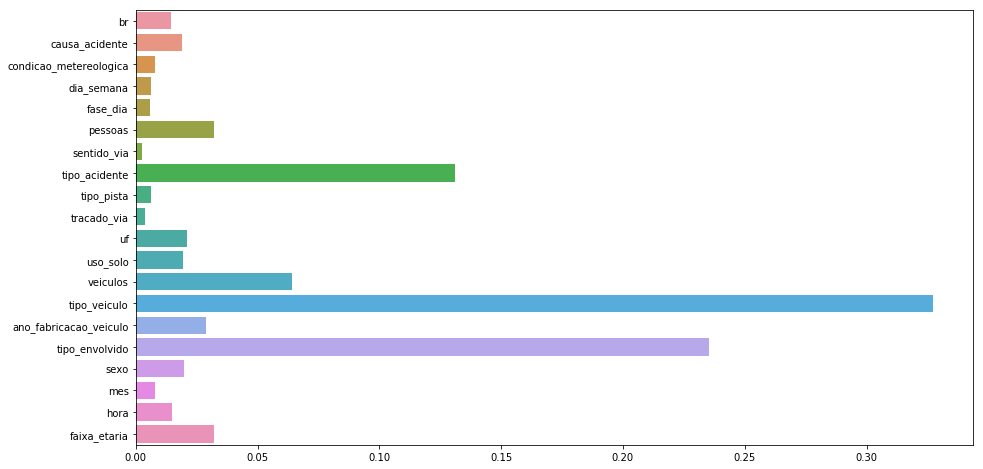

In [15]:
# verificar a importância das variáveis
X, y = df_final.drop('target', axis=1), df_final['target']
plt.figure(figsize=(15,8))
sns.barplot(x=dtc_grid.best_estimator_.feature_importances_, y=X.columns)